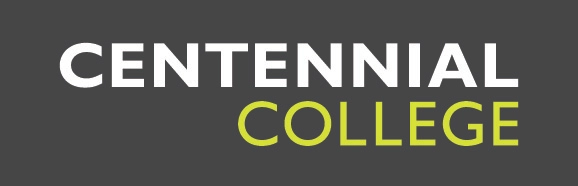

# Lab Assignment “Ensemble_learning”

In [1]:
# Importing All Libraries 
import pandas as pd
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scikitplot as skplt
import seaborn as sns
from seaborn import pairplot, heatmap
from scipy import stats
from scipy import stats, special
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import check_random_state
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.datasets import make_classification
from sklearn import svm, model_selection, metrics, linear_model
from sklearn.svm import SVC 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

### Load & check the data:

- Pregnancies - Number of times pregnant

- Glucose - Plasma glucose concentration

- BloodPressure - Diastolic blood pressure (mm Hg)

- SkinThickness - Triceps skin fold thickness (mm)

- Insulin - 2-Hour serum insulin (mu U/ml)

- BMI - Body mass index

- DiabetesPedigreeFunction - Diabetes pedigree function

- Age - Age (years)

- Outcome - Class variable (0 or 1) - (Target variable)

In [2]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [3]:

data = pd.read_csv('pima-indians-diabetes.csv', names=columns)

data_kareem = pd.DataFrame(data) # Putting this all into a dataframe.

In [4]:
data_kareem

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data_kareem.columns   # The name of columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data_kareem.info()   #  Information about the data including the index dtype and columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data_kareem.isna().sum()  # Any missing values?

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data_kareem.isnull().sum()   # Any null values?

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data_kareem.duplicated().sum()  # Any duplicated values?

0

In [10]:
data_kareem.describe(include='all')  # View statistical details.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data_kareem.nunique() # Checking unique values

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
categoricalColumns = [key for key in dict(data_kareem.dtypes)
             if dict(data_kareem.dtypes)[key] in ['object'] ]
print("The categorical values are: \n", categoricalColumns)

# Check the categorical values

The categorical values are: 
 []


In [13]:
for i in data_kareem:
    print(i,':','\n' ,data_kareem[i].unique())
    
# total number of instances in each class

Pregnancies : 
 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : 
 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : 
 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : 
 [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 4

In [14]:
print("Total number of instances in Outcome class : ",len(data_kareem[data_kareem['Outcome']==0]), ' non diabetic patients')
print("Total number of instances in Outcome class : ",len(data_kareem[data_kareem['Outcome']==1]), ' diabetic patients')

# Check for the balanced and unbalanced class

Total number of instances in Outcome class :  500  non diabetic patients
Total number of instances in Outcome class :  268  diabetic patients


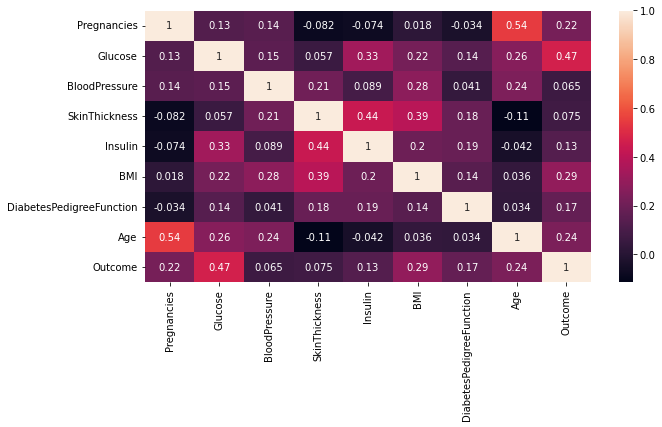

In [15]:
plt.figure(figsize=(10,5)) 
sns.heatmap(data_kareem.corr(), annot=True)
plt.show()

# Visulazing the correlation on a heatmap.

D:\Goals\DATA\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


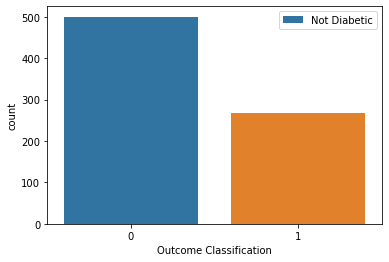

In [16]:
sns.countplot(data_kareem['Outcome'], label="count")
plt.legend(['Not Diabetic', 'Diabetic'])
plt.xlabel('Outcome Classification')
plt.show()

# Class distribution by counts of Pateint who are not diabetic(0) and diabetic(1)

## Pre-process and prepare the data for machine learning 

In [17]:
# separating features from target

X = data_kareem.drop('Outcome', axis=1)
y = data_kareem['Outcome']

In [18]:
# standard scaler transformer to transform all the numeric values

scaler = StandardScaler()
transformer_kareem = scaler.fit_transform(data_kareem)

In [19]:
# Converting the standardized data to dataFrame again

data_kareem = pd.DataFrame(transformer_kareem)

In [20]:
# 30% for testing and using 42 for the seed

X_train_kareem, X_test_kareem, y_train_kareem, y_test_kareem = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Fitting the prepared transformer

scaler.fit_transform(X_train_kareem, X_test_kareem)

array([[-0.8362943 , -0.80005088, -0.53576428, ..., -1.06015343,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365, ...,  0.64646721,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566, ...,  1.35537117,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.6143464 ,  0.90248622, ...,  1.78859026,
         1.94892066,  0.42190587],
       [-1.14304979,  0.62368349, -3.8548039 , ...,  1.36849903,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.12847154,  1.45565949, ..., -1.24394334,
        -0.60836445, -1.03426754]])

## Exercise #1: Hard Voting

In [22]:
# 5 classifiers

log_clf_K = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1400)
rf_clf_K= RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf_K= SVC(gamma="scale", random_state=42)
dt_clf_K = DecisionTreeClassifier(max_depth=3, criterion = 'entropy', random_state=42)
et_clf_K = ExtraTreeClassifier(random_state=42)

In [23]:
# Voting classifier contain 5 classifier as estimators

voting_clf = VotingClassifier(estimators=[('lr', log_clf_K), ('rf', rf_clf_K), ('svc', svm_clf_K), ('dt', dt_clf_K), 
                                          ('etc', et_clf_K)],voting='hard')

In [24]:
# Fitting the training data to the voting classifier

voting_clf.fit(X_train_kareem, y_train_kareem)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1400,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=42)),
                             ('etc', ExtraTreeClassifier(random_state=42))])

In [25]:
# Printing each classifier

for clf in (log_clf_K, rf_clf_K, svm_clf_K, dt_clf_K, et_clf_K, voting_clf):
    clf.fit(X_train_kareem, y_train_kareem)
    y_pred = clf.predict(X_test_kareem)
    print(clf.__class__.__name__, accuracy_score(y_test_kareem, y_pred))

LogisticRegression 0.7359307359307359
RandomForestClassifier 0.7532467532467533
SVC 0.7359307359307359
DecisionTreeClassifier 0.7186147186147186
ExtraTreeClassifier 0.6493506493506493
VotingClassifier 0.7402597402597403


## Exercise #2: Soft Voting

In [26]:
# 5 classifiers

log_clf_K = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1400)
rf_clf_K= RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf_K= SVC(gamma="scale", random_state=42, probability=True)
dt_clf_K = DecisionTreeClassifier(max_depth=3, criterion = 'entropy', random_state=42)
et_clf_K = ExtraTreeClassifier(random_state=42)

In [27]:
# Voting classifier contain 5 classifier as estimators

s_voting_clf = VotingClassifier(estimators=[('lr', log_clf_K), ('rf', rf_clf_K), ('svc', svm_clf_K), ('dt', dt_clf_K), 
                                          ('etc', et_clf_K)],voting='soft')

In [28]:
# Fitting the training data to the voting classifier

s_voting_clf.fit(X_train_kareem, y_train_kareem)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1400,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=42)),
                             ('etc', ExtraTreeClassifier(random_state=42))],
                 voting='soft')

In [29]:
# Printing each classifier

for clf in (log_clf_K, rf_clf_K, svm_clf_K, dt_clf_K, et_clf_K, s_voting_clf):
    clf.fit(X_train_kareem, y_train_kareem)
    y_pred = clf.predict(X_test_kareem)
    print(clf.__class__.__name__, accuracy_score(y_test_kareem, y_pred))

LogisticRegression 0.7359307359307359
RandomForestClassifier 0.7532467532467533
SVC 0.7359307359307359
DecisionTreeClassifier 0.7186147186147186
ExtraTreeClassifier 0.6493506493506493
VotingClassifier 0.7445887445887446


## Exercise #3: Random forests & Extra Trees

In [30]:
# Pipeline #1 for Extra Trees Classifier

pipeline1_kareem = Pipeline([('scalar',StandardScaler()),('et_classifier', et_clf_K)])


In [31]:
# Pipeline #2 for Decision Trees Classifier

pipeline2_kareem = Pipeline([('scalar',StandardScaler()),('dt_classifier', dt_clf_K)])


In [32]:
# Fitting the original data to boht Pipelines

print(pipeline1_kareem.fit(X, y))

print('\n')

print(pipeline2_kareem.fit(X, y))

Pipeline(steps=[('scalar', StandardScaler()),
                ('et_classifier', ExtraTreeClassifier(random_state=42))])


Pipeline(steps=[('scalar', StandardScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=42))])


In [33]:
# 10 Fold cross validation for both classifiers 

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

#rf_clf_K= RandomForestClassifier(n_estimators=100, random_state=42)
#et_clf_K = ExtraTreeClassifier(random_state=42)


#Accuracy Score
RF = model_selection.cross_val_score(rf_clf_K, X, y, cv=kfold, scoring='accuracy')
print("Accuracy of the Random Forest: %.3f (%.3f)" % (RF.mean(), RF.std()))

print('\n')

ET = model_selection.cross_val_score(et_clf_K, X, y, cv=kfold, scoring='accuracy')
print("Accuracy of the Extra Tree Classifier: %.3f (%.3f)" % (ET.mean(), ET.std()))

Accuracy of the Random Forest: 0.758 (0.058)


Accuracy of the Extra Tree Classifier: 0.682 (0.040)


In [34]:
# mean score evaluation for pipeline 1

cross_val_score(pipeline1_kareem, X, y, cv=10, scoring='accuracy').mean()

0.67053998632946

In [35]:
# mean score evaluation for pipeline 2

cross_val_score(pipeline2_kareem, X, y, cv=10, scoring='accuracy').mean()

0.7382604237867396

In [36]:
# Predicting the test with both pipelines and Printing the classification report

kareem_pipelines = [pipeline1_kareem, pipeline2_kareem]

best_accuracy=0.0
best_classifier=0
best_pipeline=""

pipe_dict={0:'Extra Tree',1:'Decision Tree'}

    
for i,model in enumerate(kareem_pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test_kareem, y_test_kareem)))

for i,model in enumerate(kareem_pipelines):
    if model.score(X_test_kareem, y_test_kareem)>best_accuracy:
        best_accuracy=model.score(X_test_kareem, y_test_kareem)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))



print('\n')

rf_clf_K.fit(X_train_kareem, y_train_kareem)
predicted = rf_clf_K.predict(X_test_kareem)
report1 = classification_report(y_test_kareem, predicted)
print('Classification report of Random Forest:', '\n', report1)


print('\n')



et_clf_K.fit(X_train_kareem, y_train_kareem)
predicted2 = et_clf_K.predict(X_test_kareem)
report2 = classification_report(y_test_kareem, predicted2)
print('Classification report of Extra Tree Classifier:', '\n',  report2)

Extra Tree Test Accuracy: 1.0
Decision Tree Test Accuracy: 0.7402597402597403
Classifier with best accuracy:Extra Tree


Classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



Classification report of Extra Tree Classifier: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       151
           1       0.49      0.53      0.51        80

    accuracy                           0.65       231
   macro avg       0.62      0.62      0.62       231
weighted avg       0.65      0.65      0.65       231



## Exercise #4: Extra Trees and Grid search

### Random Forest Classifier

In [37]:
# Parameter distribution

estimators = [int(x) for x in np.linspace(start = 20, stop = 3000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = max_depth = [int(x) for x in np.linspace(2, 1000, num = 10)]



param_grid_18 = {
 'n_estimators': estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

In [38]:
# Random search grid

#rf_clf_K= RandomForestClassifier(n_estimators=100, random_state=42)


rs_18 = RandomizedSearchCV(rf_clf_K, param_grid_18, refit=True, verbose=3, scoring='accuracy')

In [39]:
# Fit grid search

best_parameters = rs_18.fit(X_train_kareem, y_train_kareem)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=445, max_features=sqrt, n_estimators=1675;, score=0.796 total time=   1.8s
[CV 2/5] END max_depth=445, max_features=sqrt, n_estimators=1675;, score=0.778 total time=   1.8s
[CV 3/5] END max_depth=445, max_features=sqrt, n_estimators=1675;, score=0.794 total time=   1.7s
[CV 4/5] END max_depth=445, max_features=sqrt, n_estimators=1675;, score=0.710 total time=   1.8s
[CV 5/5] END max_depth=445, max_features=sqrt, n_estimators=1675;, score=0.776 total time=   1.8s
[CV 1/5] END max_depth=445, max_features=auto, n_estimators=351;, score=0.815 total time=   0.3s
[CV 2/5] END max_depth=445, max_features=auto, n_estimators=351;, score=0.769 total time=   0.3s
[CV 3/5] END max_depth=445, max_features=auto, n_estimators=351;, score=0.785 total time=   0.3s
[CV 4/5] END max_depth=445, max_features=auto, n_estimators=351;, score=0.729 total time=   0.3s
[CV 5/5] END max_depth=445, max_features=auto, n_estimators=3

In [40]:
# Accuracy score for randomized grid search 

print(best_parameters.best_estimator_.get_params())

print('\n')

print("The mean accuracy of Random Forest Classifier is:",best_parameters.score(X_test_kareem, y_test_kareem))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 445, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 351, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


The mean accuracy of Random Forest Classifier is: 0.7489177489177489


### Extra Tree Classifier

In [41]:
param_grid_18_1 = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [42]:
# Random search grid
#et_clf_K = ExtraTreeClassifier(random_state=42)

rs2_18 = RandomizedSearchCV(et_clf_K, param_grid_18_1, refit=True, verbose=3, scoring='accuracy')

In [43]:
# Fit grid search

best_parameters_2 = rs2_18.fit(X_train_kareem, y_train_kareem)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_leaf_nodes=96, min_samples_split=2;, score=0.769 total time=   0.0s
[CV 2/5] END max_leaf_nodes=96, min_samples_split=2;, score=0.676 total time=   0.0s
[CV 3/5] END max_leaf_nodes=96, min_samples_split=2;, score=0.729 total time=   0.0s
[CV 4/5] END max_leaf_nodes=96, min_samples_split=2;, score=0.720 total time=   0.0s
[CV 5/5] END max_leaf_nodes=96, min_samples_split=2;, score=0.729 total time=   0.0s
[CV 1/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.722 total time=   0.0s
[CV 2/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.667 total time=   0.0s
[CV 3/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.701 total time=   0.0s
[CV 4/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.664 total time=   0.0s
[CV 5/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.720 total time=   0.0s
[CV 1/5] END max_leaf_nodes=92, min_samples_split=2;, score=0.759 total time=   0.0s
[CV 

In [44]:
# Accuracy score for randomized grid search 

print(best_parameters_2.best_estimator_.get_params())

print('\n')

print("The mean accuracy of Extra Tree Classifier is:",best_parameters_2.score(X_test_kareem, y_test_kareem))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


The mean accuracy of Extra Tree Classifier is: 0.7056277056277056


### Decision Tree Classifier

In [45]:
# Random search grid

# dt_clf_K = DecisionTreeClassifier(max_depth=3, criterion = 'entropy', random_state=42)

rs_18_3 = RandomizedSearchCV(dt_clf_K, param_grid_18_1, refit=True, verbose=3, scoring='accuracy')

In [46]:
# Fit grid search

best_parameters_3 = rs_18_3.fit(X_train_kareem, y_train_kareem)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.750 total time=   0.0s
[CV 2/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.713 total time=   0.0s
[CV 3/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.813 total time=   0.0s
[CV 4/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.720 total time=   0.0s
[CV 5/5] END max_leaf_nodes=12, min_samples_split=4;, score=0.738 total time=   0.0s
[CV 1/5] END max_leaf_nodes=34, min_samples_split=3;, score=0.750 total time=   0.0s
[CV 2/5] END max_leaf_nodes=34, min_samples_split=3;, score=0.713 total time=   0.0s
[CV 3/5] END max_leaf_nodes=34, min_samples_split=3;, score=0.813 total time=   0.0s
[CV 4/5] END max_leaf_nodes=34, min_samples_split=3;, score=0.720 total time=   0.0s
[CV 5/5] END max_leaf_nodes=34, min_samples_split=3;, score=0.738 total time=   0.0s
[CV 1/5] END max_leaf_nodes=76, min_samples_split=4;, score=0.750 total time=   0.0s
[CV 

In [47]:
# Accuracy score for randomized grid search 

print(best_parameters_3.best_estimator_.get_params())

print('\n')

print("The mean accuracy of Decision Tree Classifier is:",best_parameters_3.score(X_test_kareem, y_test_kareem))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 12, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


The mean accuracy of Decision Tree Classifier is: 0.7186147186147186


In [48]:
# Predicting the fine tuned model parameters

predicted3 = best_parameters.predict(X_test_kareem)
report3 = classification_report(y_test_kareem, predicted3)

predicted4 = best_parameters_2.predict(X_test_kareem)
report4 = classification_report(y_test_kareem, predicted4)

predicted5 = best_parameters_3.predict(X_test_kareem)
report5 = classification_report(y_test_kareem, predicted5)

In [49]:
# Comparing the accuracy among different classifiers 

print("The mean accuracy of Random Forest Classifier is:",best_parameters.score(X_test_kareem, y_test_kareem))
print('\n')
print("The mean accuracy of Extra Tree Classifier is:",best_parameters_2.score(X_test_kareem, y_test_kareem))
print('\n')
print("The mean accuracy of Decision Tree Classifier is:",best_parameters_3.score(X_test_kareem, y_test_kareem))

The mean accuracy of Random Forest Classifier is: 0.7489177489177489


The mean accuracy of Extra Tree Classifier is: 0.7056277056277056


The mean accuracy of Decision Tree Classifier is: 0.7186147186147186


In [50]:
# Comparing the Precision and recall among different classifiers before and after tuning 

print('Before fine tuning the model: ')
print('Classification report of Random Forest:', '\n', report1)
print('\n')

print('Classification report of Extra Tree Classifier:', '\n',  report2)
print('\n')

print('\n')

print('After fine tuning the model:')
print('Classification report of Random Forest Classifier:', '\n',  report3)
print('\n')


print('Classification report of Extra Tree Classifier:', '\n',  report5)
print('\n')


print('Classification report of Decision Tree Classifier:', '\n',  report4)



Before fine tuning the model: 
Classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



Classification report of Extra Tree Classifier: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       151
           1       0.49      0.53      0.51        80

    accuracy                           0.65       231
   macro avg       0.62      0.62      0.62       231
weighted avg       0.65      0.65      0.65       231





After fine tuning the model:
Classification report of Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64   